In [ ]:
import os
import numpy as np
import pandas as pd
import regex as re

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
full_UVA_schedule = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/UVA2020_2021Results.csv")
#full_UVA_schedule = pd.read_csv("/content/drive/Shared With Me/Capstone Project/Basketball Data/UVA2020_2021Results.csv")

In [ ]:
full_UVA_schedule

,G,Date,Time,Type,Unnamed: 4,Opponent,Conf,Result,Tm,Opp,OT,W,L,Streak,Arena
0,1,"Wed, Nov 25, 2020",1:30p,REG,N,Towson,CAA,W,89,54,NaN,1,0,W 1,Mohegan Sun Arena
1,2,"Fri, Nov 27, 2020",11:30a,REG,N,San Francisco,WCC,L,60,61,NaN,1,1,L 1,Mohegan Sun Arena
2,3,"Tue, Dec 1, 2020",4:00p,REG,NaN,Saint Francis (PA),NEC,W,76,51,NaN,2,1,W 1,John Paul Jones Arena
3,4,"Fri, Dec 4, 2020",6:00p,REG,NaN,Kent State,MAC,W,71,64,OT,3,1,W 2,John Paul Jones Arena
4,5,"Tue, Dec 22, 2020",2:00p,REG,NaN,William & Mary,CAA,W,76,40,NaN,4,1,W 3,John Paul Jones Arena
5,6,"Sat, Dec 26, 2020",4:00p,REG,N,Gonzaga (1),WCC,L,75,98,NaN,4,2,L 1,NaN
6,7,"Wed, Dec 30, 2020",6:00p,REG,@,Notre Dame,ACC,W,66,57,NaN,5,2,W 1,Purcell Pavilion at the Joyce Center
7,8,"Wed, Jan 6, 2021",9:00p,REG,NaN,Wake Forest,ACC,W,70,61,NaN,6,2,W 2,John Paul Jones Arena
8,9,"Sat, Jan 9, 2021",2:00p,REG,@,Boston College,ACC,W,61,49,NaN,7,2,W 3,Silvio O. Conte Forum
9,10,"Wed, Jan 13, 2021",4:30p,REG,NaN,Notre Dame,ACC,W,80,68,NaN,8,2,W 4,John Paul Jones Arena


In [ ]:
offensive_four_factors_2020_2021 = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/offense21.csv")

In [ ]:
defensive_four_factors_2020_2021 = pd.read_csv("/content/drive/MyDrive/4th Year/Capstone Project/Basketball Data/defense21.csv")

In [ ]:
offensive_four_factors_2020_2021

,Season,TeamName,eFGPct,RankeFGPct,TOPct,RankTOPct,ORPct,RankORPct,FTRate,RankFTRate
0,2021,Abilene Christian,51.214575,110,19.164512,183,30.586907,85,32.726046,143
1,2021,Air Force,52.051282,81,22.592682,329,15.341702,347,30.854701,188
2,2021,Akron,51.490196,95,17.041053,77,30.090791,99,30.666667,193
3,2021,Alabama,51.670588,90,18.598243,157,32.245532,46,28.800000,243
4,2021,Alabama A&M,44.758065,331,21.449228,299,28.245614,157,31.797235,162
...,...,...,...,...,...,...,...,...,...,...
352,2021,Wright St.,54.350782,29,18.098508,127,34.172662,26,34.534330,88
353,2021,Wyoming,53.710125,42,15.961624,31,22.911964,304,35.298197,75
354,2021,Xavier,52.140078,80,15.970360,32,26.809651,200,25.914397,307
355,2021,Yale,0.000000,348,100.000000,348,0.000000,348,0.000000,348


In [ ]:
defensive_four_factors_2020_2021

,Season,TeamName,eFGPct,RankeFGPct,TOPct,RankTOPct,ORPct,RankORPct,FTRate,RankFTRate
0,2021,Abilene Christian,46.012510,22,26.492119,1,27.851140,168,41.125880,328
1,2021,Air Force,57.372040,343,21.779096,41,35.537190,343,32.849503,206
2,2021,Akron,48.622800,104,16.434850,300,28.836634,208,27.314461,68
3,2021,Alabama,45.762299,16,20.502639,77,29.160305,222,30.686800,158
4,2021,Alabama A&M,43.995511,3,17.983632,220,29.371817,232,37.373737,297
...,...,...,...,...,...,...,...,...,...,...
352,2021,Wright St.,45.110821,9,16.662118,297,25.025641,62,21.773142,4
353,2021,Wyoming,52.926997,287,18.169083,208,27.797409,166,33.884298,236
354,2021,Xavier,47.595420,57,16.376386,303,27.272727,147,23.511450,17
355,2021,Yale,100.000000,348,0.000000,348,100.000000,348,100.000000,348


Going to need a function that pulls both the offensive and defensive factors for both the home and away team

Need to create a dataframe for the opponent's offense and defense and UVA's offense and defense

## Data Cleaning

In [ ]:
pattern = r"[(\d)]"

In [ ]:
clean_opponent_list = []
for team in full_UVA_schedule.index:
  clean_opponent = re.sub(pattern,"",full_UVA_schedule["Opponent"][team])
  clean_opponent = clean_opponent.replace("()","")
  if clean_opponent == "North Carolina State":
    clean_opponent = "N.C. State"
  if clean_opponent =="Florida State ":
    clean_opponent ="Florida St."
    # print("Florida")
    
  # print(clean_opponent) 
  clean_opponent = clean_opponent.strip()
  clean_opponent_list.append(clean_opponent)
full_UVA_schedule["Official Opponent"] = clean_opponent_list


In [ ]:
full_UVA_schedule

,G,Date,Time,Type,Unnamed: 4,Opponent,Conf,Result,Tm,Opp,OT,W,L,Streak,Arena,Official Opponent
0,1,"Wed, Nov 25, 2020",1:30p,REG,N,Towson,CAA,W,89,54,NaN,1,0,W 1,Mohegan Sun Arena,Towson
1,2,"Fri, Nov 27, 2020",11:30a,REG,N,San Francisco,WCC,L,60,61,NaN,1,1,L 1,Mohegan Sun Arena,San Francisco
2,3,"Tue, Dec 1, 2020",4:00p,REG,NaN,Saint Francis (PA),NEC,W,76,51,NaN,2,1,W 1,John Paul Jones Arena,Saint Francis PA
3,4,"Fri, Dec 4, 2020",6:00p,REG,NaN,Kent State,MAC,W,71,64,OT,3,1,W 2,John Paul Jones Arena,Kent State
4,5,"Tue, Dec 22, 2020",2:00p,REG,NaN,William & Mary,CAA,W,76,40,NaN,4,1,W 3,John Paul Jones Arena,William & Mary
5,6,"Sat, Dec 26, 2020",4:00p,REG,N,Gonzaga (1),WCC,L,75,98,NaN,4,2,L 1,NaN,Gonzaga
6,7,"Wed, Dec 30, 2020",6:00p,REG,@,Notre Dame,ACC,W,66,57,NaN,5,2,W 1,Purcell Pavilion at the Joyce Center,Notre Dame
7,8,"Wed, Jan 6, 2021",9:00p,REG,NaN,Wake Forest,ACC,W,70,61,NaN,6,2,W 2,John Paul Jones Arena,Wake Forest
8,9,"Sat, Jan 9, 2021",2:00p,REG,@,Boston College,ACC,W,61,49,NaN,7,2,W 3,Silvio O. Conte Forum,Boston College
9,10,"Wed, Jan 13, 2021",4:30p,REG,NaN,Notre Dame,ACC,W,80,68,NaN,8,2,W 4,John Paul Jones Arena,Notre Dame


In [ ]:
def grab_stats(offensive_factors, defensive_factors, team_name):
  offense_factors = offensive_factors[offensive_factors["TeamName"]== team_name]
  offense_factors = offense_factors.drop(["RankeFGPct","RankTOPct","RankORPct","RankFTRate","Season", "TeamName"],axis =1)
  defense_factors = defensive_factors[defensive_factors["TeamName"]== team_name]
  defense_factors = defense_factors.drop(["RankeFGPct","RankTOPct","RankORPct","RankFTRate","Season","TeamName"],axis =1)
  return offense_factors.values.tolist()[0], defense_factors.values.tolist()[0]


In [ ]:
uva_offense, uva_defense = grab_stats(offensive_four_factors_2020_2021,defensive_four_factors_2020_2021,"Virginia")

In [ ]:
uva_offense

[55.42986425339371, 14.9912033059204, 22.701949860724202, 21.7194570135747]

In [ ]:
uva_defense

[47.9939439818319, 15.253058385499802, 22.5647348951911, 24.753974261922803]

In [ ]:
clean_data_frame = full_UVA_schedule[["Unnamed: 4","Official Opponent","Tm","Opp"]]

In [ ]:
clean_data_frame

,Unnamed: 4,Official Opponent,Tm,Opp
0,N,Towson,89,54
1,N,San Francisco,60,61
2,NaN,Saint Francis PA,76,51
3,NaN,Kent State,71,64
4,NaN,William & Mary,76,40
5,N,Gonzaga,75,98
6,@,Notre Dame,66,57
7,NaN,Wake Forest,70,61
8,@,Boston College,61,49
9,NaN,Notre Dame,80,68


In [ ]:
clean_data_frame[["Opp Off eFG%","Opp Off TOP%","Opp Off ORB%", "Opp Off FTR%"]] = np.NaN
clean_data_frame[["Opp Def eFG%","Opp Def TOP%","Opp Def ORB%", "Opp Def FTR%"]] = np.NaN

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [ ]:
clean_data_frame

,Unnamed: 4,Official Opponent,Tm,Opp,Opp Off eFG%,Opp Off TOP%,Opp Off ORB%,Opp Off FTR%,Opp Def eFG%,Opp Def TOP%,Opp Def ORB%,Opp Def FTR%
0,N,Towson,89,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N,San Francisco,60,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Saint Francis PA,76,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Kent State,71,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,William & Mary,76,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,N,Gonzaga,75,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,@,Notre Dame,66,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Wake Forest,70,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,@,Boston College,61,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Notre Dame,80,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

for index,row in clean_data_frame.iterrows():
  #team_list.append(row["Official Opponent"])
  try:
    opponent_off_fac, opponent_def_fac = grab_stats(offensive_four_factors_2020_2021, defensive_four_factors_2020_2021, row["Official Opponent"])
    final_list = opponent_off_fac + opponent_def_fac
    clean_data_frame.at[ index, "Opp Off eFG%"] = final_list[0]
    clean_data_frame.at[ index, "Opp Off TOP%"] = final_list[1]
    clean_data_frame.at[ index, "Opp Off ORB%"] = final_list[2]
    clean_data_frame.at[ index, "Opp Off FTR%"] = final_list[3]
    clean_data_frame.at[ index, "Opp Def eFG%"] = final_list[4]
    clean_data_frame.at[ index, "Opp Def TOP%"] = final_list[5]
    clean_data_frame.at[ index, "Opp Def ORB%"] = final_list[6]
    clean_data_frame.at[ index, "Opp Def FTR%"] = final_list[7]
  except IndexError:
    continue
#total_list.append(opponent_off_fac.iloc[0])


In [ ]:
s,x = grab_stats(offensive_four_factors_2020_2021,defensive_four_factors_2020_2021,"Gonzaga")
print(s+x)

[61.01781170483461, 16.127934315322097, 30.070635721493396, 35.725190839694704, 47.6856561546287, 19.3116304399051, 23.781009409751896, 25.6866734486267]


In [ ]:
clean_data_frame

,Unnamed: 4,Official Opponent,Tm,Opp,Opp Off eFG%,Opp Off TOP%,Opp Off ORB%,Opp Off FTR%,Opp Def eFG%,Opp Def TOP%,Opp Def ORB%,Opp Def FTR%
0,N,Towson,89,54,45.402844,18.354074,34.090909,33.364929,52.624180,15.977877,30.269414,29.334583
1,N,San Francisco,60,61,51.220317,16.911009,24.779736,21.437995,49.775785,19.787031,24.657534,39.910314
2,NaN,Saint Francis PA,76,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Kent State,71,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,William & Mary,76,40,46.097046,20.157480,28.571429,31.962025,50.974659,16.942710,31.756757,23.586745
5,N,Gonzaga,75,98,61.017812,16.127934,30.070636,35.725191,47.685656,19.311630,23.781009,25.686673
6,@,Notre Dame,66,57,53.887762,15.697579,21.974148,25.895876,50.840841,12.729310,29.793814,19.699700
7,NaN,Wake Forest,70,61,48.975235,20.014976,26.158038,28.522630,54.451167,17.900718,25.909091,32.065687
8,@,Boston College,61,49,49.789030,19.156790,25.373134,29.704641,55.463576,18.465209,28.656716,29.056291
9,NaN,Notre Dame,80,68,53.887762,15.697579,21.974148,25.895876,50.840841,12.729310,29.793814,19.699700


In [ ]:
def grab_stats(offensive_factors, defensive_factors, team_name):
  offense_factors = offensive_factors[offensive_factors["TeamName"]== team_name]
  offense_factors = offense_factors.drop(["RankeFGPct","RankTOPct","RankORPct","RankFTRate","Season", "TeamName"],axis =1)
  defense_factors = defensive_factors[defensive_factors["TeamName"]== team_name]
  defense_factors = defense_factors.drop(["RankeFGPct","RankTOPct","RankORPct","RankFTRate","Season","TeamName"],axis =1)
  return offense_factors.values.tolist()[0], defense_factors.values.tolist()[0]

In [ ]:
uva_total = uva_offense + uva_defense

In [ ]:
clean_data_frame["Main Off eFG%"] = uva_total[0]
clean_data_frame["Main Off TOP%"] = uva_total[1]
clean_data_frame["Main Off ORB%"] = uva_total[2]
clean_data_frame["Main Off FTR%"] = uva_total[3]
clean_data_frame["Main Def eFG%"] = uva_total[4]
clean_data_frame["Main Def TOP%"] = uva_total[5]
clean_data_frame["Main Def ORB%"] = uva_total[6]
clean_data_frame["Main Def FTR%"] = uva_total[7]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
clean_data_frame

,Unnamed: 4,Official Opponent,Tm,Opp,Opp Off eFG%,Opp Off TOP%,Opp Off ORB%,Opp Off FTR%,Opp Def eFG%,Opp Def TOP%,Opp Def ORB%,Opp Def FTR%,Main Off eFG%,Main Off TOP%,Main Off ORB%,Main Off FTR%,Main Def eFG%,Main Def TOP%,Main Def ORB%,Main Def FTR%
0,N,Towson,89,54,45.402844,18.354074,34.090909,33.364929,52.624180,15.977877,30.269414,29.334583,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974
1,N,San Francisco,60,61,51.220317,16.911009,24.779736,21.437995,49.775785,19.787031,24.657534,39.910314,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974
2,NaN,Saint Francis PA,76,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974
3,NaN,Kent State,71,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974
4,NaN,William & Mary,76,40,46.097046,20.157480,28.571429,31.962025,50.974659,16.942710,31.756757,23.586745,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974
5,N,Gonzaga,75,98,61.017812,16.127934,30.070636,35.725191,47.685656,19.311630,23.781009,25.686673,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974
6,@,Notre Dame,66,57,53.887762,15.697579,21.974148,25.895876,50.840841,12.729310,29.793814,19.699700,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974
7,NaN,Wake Forest,70,61,48.975235,20.014976,26.158038,28.522630,54.451167,17.900718,25.909091,32.065687,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974
8,@,Boston College,61,49,49.789030,19.156790,25.373134,29.704641,55.463576,18.465209,28.656716,29.056291,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974
9,NaN,Notre Dame,80,68,53.887762,15.697579,21.974148,25.895876,50.840841,12.729310,29.793814,19.699700,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974


Attempt to do Linear Regression

In [ ]:
clean_data_frame["Final Point Differential"] = clean_data_frame["Tm"] - clean_data_frame["Opp"]

In [ ]:
clean_data_frame

,Unnamed: 4,Official Opponent,Tm,Opp,Opp Off eFG%,Opp Off TOP%,Opp Off ORB%,Opp Off FTR%,Opp Def eFG%,Opp Def TOP%,Opp Def ORB%,Opp Def FTR%,Main Off eFG%,Main Off TOP%,Main Off ORB%,Main Off FTR%,Main Def eFG%,Main Def TOP%,Main Def ORB%,Main Def FTR%,Final Point Differential
0,N,Towson,89,54,45.402844,18.354074,34.090909,33.364929,52.624180,15.977877,30.269414,29.334583,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,35
1,N,San Francisco,60,61,51.220317,16.911009,24.779736,21.437995,49.775785,19.787031,24.657534,39.910314,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,-1
2,NaN,Saint Francis PA,76,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,25
3,NaN,Kent State,71,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,7
4,NaN,William & Mary,76,40,46.097046,20.157480,28.571429,31.962025,50.974659,16.942710,31.756757,23.586745,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,36
5,N,Gonzaga,75,98,61.017812,16.127934,30.070636,35.725191,47.685656,19.311630,23.781009,25.686673,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,-23
6,@,Notre Dame,66,57,53.887762,15.697579,21.974148,25.895876,50.840841,12.729310,29.793814,19.699700,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,9
7,NaN,Wake Forest,70,61,48.975235,20.014976,26.158038,28.522630,54.451167,17.900718,25.909091,32.065687,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,9
8,@,Boston College,61,49,49.789030,19.156790,25.373134,29.704641,55.463576,18.465209,28.656716,29.056291,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,12
9,NaN,Notre Dame,80,68,53.887762,15.697579,21.974148,25.895876,50.840841,12.729310,29.793814,19.699700,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,12


In [ ]:
clean_data_frame = clean_data_frame.drop(labels = [2,3], axis=0)

MAKE SURE TO CONVERT UNAMED USING ONEHOTENCODER LATER

In [ ]:
clean_data_frame = clean_data_frame.drop(columns=['Unnamed: 4','Official Opponent'])

In [ ]:
clean_data_frame

,Tm,Opp,Opp Off eFG%,Opp Off TOP%,Opp Off ORB%,Opp Off FTR%,Opp Def eFG%,Opp Def TOP%,Opp Def ORB%,Opp Def FTR%,Main Off eFG%,Main Off TOP%,Main Off ORB%,Main Off FTR%,Main Def eFG%,Main Def TOP%,Main Def ORB%,Main Def FTR%,Final Point Differential
0,89,54,45.402844,18.354074,34.090909,33.364929,52.624180,15.977877,30.269414,29.334583,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,35
1,60,61,51.220317,16.911009,24.779736,21.437995,49.775785,19.787031,24.657534,39.910314,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,-1
4,76,40,46.097046,20.157480,28.571429,31.962025,50.974659,16.942710,31.756757,23.586745,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,36
5,75,98,61.017812,16.127934,30.070636,35.725191,47.685656,19.311630,23.781009,25.686673,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,-23
6,66,57,53.887762,15.697579,21.974148,25.895876,50.840841,12.729310,29.793814,19.699700,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,9
7,70,61,48.975235,20.014976,26.158038,28.522630,54.451167,17.900718,25.909091,32.065687,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,9
8,61,49,49.789030,19.156790,25.373134,29.704641,55.463576,18.465209,28.656716,29.056291,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,12
9,80,68,53.887762,15.697579,21.974148,25.895876,50.840841,12.729310,29.793814,19.699700,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,12
10,85,50,49.962207,19.375415,26.564496,23.204837,48.656126,21.549554,26.937738,28.932806,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,35
11,64,62,54.064772,16.058697,24.375743,28.420357,52.405498,22.648301,30.382775,28.865979,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,2


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# OUr column to predict is the point differential
model = LinearRegression()

In [ ]:
train_set, test_set = train_test_split(clean_data_frame,test_size = 0.2, random_state = 9)

In [ ]:
y = train_set["Final Point Differential"].copy()
x = train_set.drop(columns="Final Point Differential")

In [ ]:
y_test = test_set["Final Point Differential"].copy()
x_test = test_set.drop(columns="Final Point Differential")

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [ ]:

from sklearn.metrics import mean_squared_error

basketball_predictions = lin_reg.predict(x)
lin_mse = mean_squared_error(y, basketball_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.4552158858602253e-14

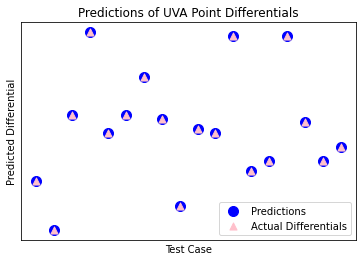

In [ ]:
import matplotlib.pyplot as plt
plt.scatter([x for x in range(len(y))], basketball_predictions, color="blue", marker="o", s=100)
plt.scatter([x for x in range(len(y))], y, color="pink", marker="^", s=50)
#plt.scatter([x for x in range(5)], basketball_predictions, color="blue", marker="o", s=100)
plt.xticks(())
plt.yticks(())
plt.xlabel("Test Case")
plt.ylabel("Predicted Differential")
plt.title("Predictions of UVA Point Differentials")
plt.legend(['Predictions', 'Actual Differentials'])
plt.show()

## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=2)


In [ ]:
tree_reg.fit(x,y)

DecisionTreeRegressor(random_state=2)

In [ ]:
basketball_predictions = tree_reg.predict(x)
tree_mse = mean_squared_error(y, basketball_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x, y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
tree_rmse_scores

array([14.76482306, 17.20465053, 14.86606875,  9.21954446,  9.5131488 ,
        2.91547595, 12.74754878,  1.58113883,  3.        , 17.        ])

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(x,y)

RandomForestRegressor(random_state=42)

In [ ]:
random_forest_predictions = random_forest_reg.predict(x)
random_tree_mse = mean_squared_error(y,random_forest_predictions)
random_tree_rmse = np.sqrt(random_tree_mse)
random_tree_rmse

4.178825592595764

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(random_forest_reg, x, random_forest_predictions,
                         scoring="neg_mean_squared_error", cv=10)
random_tree_rmse_scores = np.sqrt(-scores)
random_tree_rmse_scores


array([ 9.37599716, 10.93255948,  2.34927929,  1.76126142,  7.00490485,
        6.13798938,  2.22110384,  7.10704711,  3.381     ,  1.8764    ])


## Neural Network

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense






## Logistic Regression

In [ ]:
clean_data_frame

,Tm,Opp,Opp Off eFG%,Opp Off TOP%,Opp Off ORB%,Opp Off FTR%,Opp Def eFG%,Opp Def TOP%,Opp Def ORB%,Opp Def FTR%,Main Off eFG%,Main Off TOP%,Main Off ORB%,Main Off FTR%,Main Def eFG%,Main Def TOP%,Main Def ORB%,Main Def FTR%,Final Point Differential
0,89,54,45.402844,18.354074,34.090909,33.364929,52.624180,15.977877,30.269414,29.334583,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,35
1,60,61,51.220317,16.911009,24.779736,21.437995,49.775785,19.787031,24.657534,39.910314,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,-1
4,76,40,46.097046,20.157480,28.571429,31.962025,50.974659,16.942710,31.756757,23.586745,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,36
5,75,98,61.017812,16.127934,30.070636,35.725191,47.685656,19.311630,23.781009,25.686673,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,-23
6,66,57,53.887762,15.697579,21.974148,25.895876,50.840841,12.729310,29.793814,19.699700,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,9
7,70,61,48.975235,20.014976,26.158038,28.522630,54.451167,17.900718,25.909091,32.065687,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,9
8,61,49,49.789030,19.156790,25.373134,29.704641,55.463576,18.465209,28.656716,29.056291,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,12
9,80,68,53.887762,15.697579,21.974148,25.895876,50.840841,12.729310,29.793814,19.699700,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,12
10,85,50,49.962207,19.375415,26.564496,23.204837,48.656126,21.549554,26.937738,28.932806,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,35
11,64,62,54.064772,16.058697,24.375743,28.420357,52.405498,22.648301,30.382775,28.865979,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,2


In [ ]:
log_data_frame = clean_data_frame

In [ ]:
log_data_frame['BinaryResult'] = np.where(log_data_frame['Final Point Differential'] > 0 , 1, 0)

In [ ]:
log_data_frame

,Tm,Opp,Opp Off eFG%,Opp Off TOP%,Opp Off ORB%,Opp Off FTR%,Opp Def eFG%,Opp Def TOP%,Opp Def ORB%,Opp Def FTR%,Main Off eFG%,Main Off TOP%,Main Off ORB%,Main Off FTR%,Main Def eFG%,Main Def TOP%,Main Def ORB%,Main Def FTR%,Final Point Differential,BinaryResult
0,89,54,45.402844,18.354074,34.090909,33.364929,52.624180,15.977877,30.269414,29.334583,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,35,1
1,60,61,51.220317,16.911009,24.779736,21.437995,49.775785,19.787031,24.657534,39.910314,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,-1,0
4,76,40,46.097046,20.157480,28.571429,31.962025,50.974659,16.942710,31.756757,23.586745,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,36,1
5,75,98,61.017812,16.127934,30.070636,35.725191,47.685656,19.311630,23.781009,25.686673,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,-23,0
6,66,57,53.887762,15.697579,21.974148,25.895876,50.840841,12.729310,29.793814,19.699700,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,9,1
7,70,61,48.975235,20.014976,26.158038,28.522630,54.451167,17.900718,25.909091,32.065687,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,9,1
8,61,49,49.789030,19.156790,25.373134,29.704641,55.463576,18.465209,28.656716,29.056291,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,12,1
9,80,68,53.887762,15.697579,21.974148,25.895876,50.840841,12.729310,29.793814,19.699700,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,12,1
10,85,50,49.962207,19.375415,26.564496,23.204837,48.656126,21.549554,26.937738,28.932806,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,35,1
11,64,62,54.064772,16.058697,24.375743,28.420357,52.405498,22.648301,30.382775,28.865979,55.429864,14.991203,22.70195,21.719457,47.993944,15.253058,22.564735,24.753974,2,1


In [ ]:
log_train_set, log_test_set = train_test_split(log_data_frame,test_size = 0.2, random_state = 9)

In [ ]:
y = log_train_set["BinaryResult"].copy()
x = log_train_set.drop(columns="BinaryResult")

In [ ]:
from  sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression(random_state=0, max_iter=1000).fit(x,y)

In [ ]:

from sklearn.metrics import log_loss

log_basketball_predictions = log_reg.predict(x)
log_mse = log_loss(y, log_basketball_predictions)
#log_mse = mean_squared_error(y, log_basketball_predictions)
#log_rmse = np.sqrt(log_mse)
log_mse

9.992007221626415e-16

In [ ]:
log_basketball_predictions

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
y

20    0
18    0
8     1
4     1
15    1
17    1
12    1
21    1
13    0
16    1
14    1
0     1
24    0
19    0
10    1
22    1
1     0
23    1
Name: BinaryResult, dtype: int64